## Merge database tables into a flat dataframe

In [15]:
import sqlite3
import pandas as pd
# import spacy
# import sys

pd.set_option("display.max_colwidth", 60)
pd.set_option("display.max_rows", 100)

In [16]:
RELEASE_DB_NAME = "release_db.sqlite"
conn = sqlite3.connect(RELEASE_DB_NAME)

### Read in the tables

In [17]:

policy_texts_df = pd.read_sql_query("SELECT * FROM policy_texts", conn)


In [18]:
policy_texts_df.tail()

id                                                  policy_text   
333981  333982  Introduction\n\nCassava Enterprises (Gibraltar) Limited ...  \
333982  333983  Privacy policy This privacy policy applies only to this ...   
333983  333984  Last updated: September 16, 2014\n\nOnestop Internet, In...   
333984  333985  84 Lumber Website Privacy Policy\n\nThe 84 Lumber Compan...   
333985  333986    * About index\n  * Contact us\n  * Search tips\n  * St...   

        flesch_kincaid       smog     flesch_ease  length   
333981       15.972146  16.322122       difficult   11953  \
333982       14.503463        NaN       difficult    5582   
333983       14.287103  15.774803       difficult   16906   
333984       13.354206        NaN       difficult    4168   
333985       16.554437  18.704411  very_confusing   18984   

                                            sha1               simhash  
333981  bebc0f148f8a8e62d63903bbf367b01e4ddfd6f8   5331428010802882003  
333982  33fc2ba320eac1bdfac5b0da0b095109c29c8b28  16403546848911186076  
333983  fb8828ae29968ee6555c6238214aef2dd959fbad  13418782305040989778  
333984  7de55ba3018ceee82880d4709c302fbd24fd5713  17414741223863505154  
333985  4b175a2504cbfc485c496f555687b868b7ff386d  15429291216000498142

In [19]:
simply_the_text = policy_texts_df[["id", "policy_text"]]
simply_the_text.head()

id                                                  policy_text
0   1  DocuSign Express Privacy Policy (11/03)\n\nThe privacy p...
1   2  DocuSign Express™ Privacy Policy (11/03)\n\nOverview\n\n...
2   3  The privacy practices of this statement apply to our ser...
3   4  Overview \n\nThe privacy practices of this statement app...
4   5  The privacy practices of this statement apply to our ser...

In [20]:
simply_the_text = simply_the_text[:1500]

print(len(simply_the_text))

1500


In [21]:
# use labels.json to label policies in simply_the_text dataframe
import json
with open('labels.json') as f:
    labels = json.load(f)
# create a new column in simply_the_text dataframe called "label"
simply_the_text["label"] = ""

simply_the_text.head()

# for each policy in simply_the_text dataframe, find the corresponding label in labels.json
for i in range(len(simply_the_text)):
    for title, labels_list in labels.items():
        # if any word in labels_list appears in policy_text, then add the title in the labels. there can be multiple labels for each policy
        if any(word in simply_the_text["policy_text"][i] for word in labels_list):
            simply_the_text["label"][i] +=  ", " + title if simply_the_text["label"][i] != "" else title

simply_the_text.head()

/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_1308/2061048215.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simply_the_text["label"][i] +=  ", " + title if simply_the_text["label"][i] != "" else title
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_1308/2061048215.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simply_the_text["label"][i] +=  ", " + title if simply_the_text["label"][i] != "" else title
/var/folders/np/gp8d_33j4jxd2pd79hf5w03r0000gn/T/ipykernel_1308/2061048215.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

id                                                  policy_text   
0   1  DocuSign Express Privacy Policy (11/03)\n\nThe privacy p...  \
1   2  DocuSign Express™ Privacy Policy (11/03)\n\nOverview\n\n...   
2   3  The privacy practices of this statement apply to our ser...   
3   4  Overview \n\nThe privacy practices of this statement app...   
4   5  The privacy practices of this statement apply to our ser...   

                                                         label  
0  business, law, regulations, usability, technology, multi...  
1  business, law, regulations, usability, technology, multi...  
2  business, law, regulations, usability, technology, multi...  
3  business, law, regulations, usability, technology, multi...  
4  business, law, regulations, usability, technology, multi...

In [23]:
import json
import pandas as pd

with open('labels.json') as f:
    labels = json.load(f)

# Create a new column in `simply_the_text` dataframe called "annotations"
simply_the_text["annotations"] = ""

# Iterate over each policy in `simply_the_text` dataframe
for i, row in simply_the_text.iterrows():
    policy_text = row["policy_text"]
    annotations = []
    seen_tokens = set()  # Track the tokens that have been seen
    
    # Iterate over each label in labels.json
    for label, label_keywords in labels.items():
        # Check if any word in `label_keywords` appears in `policy_text`
        for keyword in label_keywords:
            start = policy_text.find(keyword)
            while start != -1:
                end = start + len(keyword)
                if all(token not in seen_tokens for token in range(start, end)):
                    annotations.append((start, end, label))
                    seen_tokens.update(range(start, end))
                start = policy_text.find(keyword, end)
    
    # Add the annotations to the "annotations" column
    simply_the_text.at[i, "annotations"] = {"entities": annotations}

# Display the updated dataframe
print(simply_the_text)

        id                                                  policy_text   
0        1  DocuSign Express Privacy Policy (11/03)\n\nThe privacy p...  \
1        2  DocuSign Express™ Privacy Policy (11/03)\n\nOverview\n\n...   
2        3  The privacy practices of this statement apply to our ser...   
3        4  Overview \n\nThe privacy practices of this statement app...   
4        5  The privacy practices of this statement apply to our ser...   
...    ...                                                          ...   
1495  1496  Proformative Privacy Policy\n\nYour privacy is our top c...   
1496  1497  Proformative Privacy Policy\n\nYour privacy is our top c...   
1497  1498  Your privacy is important to Profoto. Our Privacy Policy...   
1498  1499  Your privacy is important to Profoto. Our Privacy Policy...   
1499  1500  Flatdog Media, Inc. knows that you care how information ...   

                                                            label   
0     business, law, regulatio

In [24]:
simply_the_text.head()

id                                                  policy_text   
0   1  DocuSign Express Privacy Policy (11/03)\n\nThe privacy p...  \
1   2  DocuSign Express™ Privacy Policy (11/03)\n\nOverview\n\n...   
2   3  The privacy practices of this statement apply to our ser...   
3   4  Overview \n\nThe privacy practices of this statement app...   
4   5  The privacy practices of this statement apply to our ser...   

                                                         label   
0  business, law, regulations, usability, technology, multi...  \
1  business, law, regulations, usability, technology, multi...   
2  business, law, regulations, usability, technology, multi...   
3  business, law, regulations, usability, technology, multi...   
4  business, law, regulations, usability, technology, multi...   

                                                   annotations  
0  {'entities': [(6141, 6150, 'business'), (11910, 11915, '...  
1  {'entities': [(6228, 6237, 'business'), (12072, 12077, '...  
2  {'entities': [(6169, 6178, 'business'), (12074, 12079, '...  
3  {'entities': [(6189, 6198, 'business'), (12100, 12105, '...  
4  {'entities': [(6202, 6211, 'business'), (12105, 12110, '...

In [ ]:
import pandas as pd
import spacy
import random
from spacy.util import minibatch, compounding
from spacy.training.example import Example

train_data = simply_the_text.sample(frac=0.8, random_state=42)
test_data = simply_the_text.drop(train_data.index)
nlp = spacy.blank("en")  # Use an appropriate spaCy model

# Prepare the training data in the required format for NER
train_data_ner = []
for _, row in train_data.iterrows():
    doc = nlp.make_doc(row["policy_text"])
    annotations = row["annotations"]
    
    example = Example.from_dict(doc, annotations)
    train_data_ner.append(example)

# Train the NER model
print("Training the NER model...")

# Add the NER component to the pipeline
if "ner" not in nlp.pipe_names:
    ner = nlp.create_pipe("ner")
    nlp.add_pipe("ner", last=True)
else:
    ner = nlp.get_pipe("ner")

# get all label titles from labels.json
import json 
with open('labels.json') as f:
    labels = json.load(f)
labels = list(labels.keys())
print(labels)

for label in labels:
    ner.add_label(label)

# Disable other pipeline components for training efficiency
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    batch_sizes = compounding(4.0, 32.0, 1.001)
    epochs = 8
    all_losses = []
    for epoch in range(epochs):
        random.shuffle(train_data_ner)
        losses = {}
        batches = minibatch(train_data_ner, size=batch_sizes)
        print(f"Epoch {epoch+1}/{epochs}")
        for batch in batches:
            nlp.update(batch, drop=0.3, losses=losses)
        all_losses.append(losses)
        print(f"Loss: {losses['ner']:.4f}")

        # if loss increases, stop training
        if epoch > 0 and losses["ner"] > all_losses[epoch-1]["ner"]:
            break


# Evaluate the model on the testing set
print("Evaluating the model on the testing set...")
test_data_ner = []
for _, row in test_data.iterrows():
    doc = nlp.make_doc(row["policy_text"])
    annotations = row["annotations"]
    example = Example.from_dict(doc, annotations)
    test_data_ner.append(example)


In [26]:
# save the trained model
nlp.to_disk("model")

In [32]:
print("Making predictions using the trained model...")
predictions = []
for example in test_data_ner:
    doc = nlp(example.text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    predictions.append(entities)

# Evaluate the predictions
print("Evaluating the predictions...")
results = pd.DataFrame(columns=["text", "label", "prediction"])
for (_, row), prediction in zip(test_data.iterrows(), predictions):
    text = row["policy_text"]
    label = row["label"]
    prediction = ", ".join([f"{ent[0]} ({ent[1]})" for ent in prediction])
    # print(f"Text: {text}")
    # print(f"True label: {label}")
    # print(f"Prediction: {prediction}")
    # add the results to the dataframe
    results.loc[len(results.index)] = [text, label, prediction]

Making predictions using the trained model...
Evaluating the predictions...


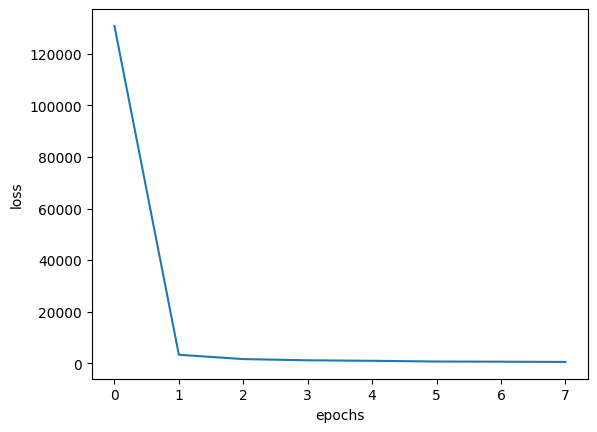

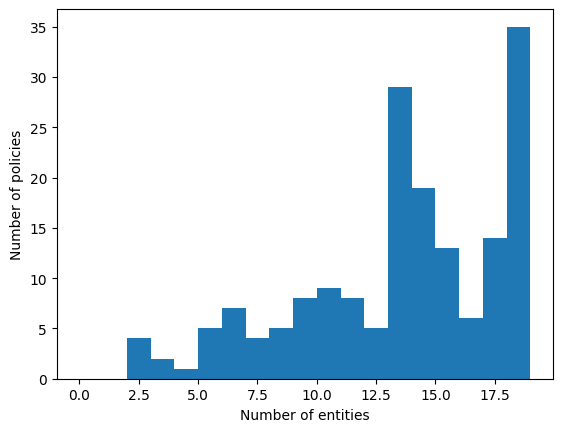

In [36]:
# Display the evaluation results
results.head()

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Plot the confusion matrix
# plt.figure(figsize=(20, 20))
# sns.heatmap(pd.crosstab(results["label"], results["prediction"], rownames=["Actual"], colnames=["Predicted"]))
# plt.show()

# Print the classification report
# classification_report = classification_report(results["label"], results["prediction"])
# print(classification_report)

# plot the loss curve
import matplotlib.pyplot as plt
import seaborn as sns

losses = [loss["ner"] for loss in all_losses]
sns.lineplot(x=range(len(losses)), y=losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# entity distribution
# Get the number of entities in each policy
num_entities = [len(row["annotations"]["entities"]) for _, row in simply_the_text.iterrows()]

# Plot the distribution
plt.hist(num_entities, bins=range(0, 20, 1))
plt.xlabel("Number of entities")
plt.ylabel("Number of policies")
plt.show()


In [37]:
# use the model
import spacy
nlp = spacy.load("model")

# Define a function to predict labels for a given text
def predict_labels(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Define a function to display the predicted labels
def display_predictions(text):
    entities = predict_labels(text)
    for entity in entities:
        # find the last fullstop before the start of the entity
        entity_start = text.find(entity[0])
        entity_end = entity_start + len(entity[0])
        start = text.rfind(".", 0, entity_start) + 1
        # find the next fullstop after the end of the entity
        end = text.find(".", entity_end) + 1
        # print the sentence containing the entity
        print(f"{text[start:end].strip()} : {entity[1]}")
        

# Predict labels for the given text
# get the 501th policy text
text = policy_texts_df[["id", "policy_text"]]
# print(text.iloc[501, 1])
display_predictions(text.iloc[1501, 1])

This MuleSoft Privacy Statement ("Privacy Statement") describes our privacy practices. : privacy
Please read this Privacy Statement carefully to learn how we collect, use, share and otherwise process information relating to individuals ("Personal Data"), and your rights and choices regarding our processing of your Personal Data. : data
When applications are provided by third parties, the privacy statement of the third party applies, and this Privacy Statement does not apply. : privacy
Please read this Privacy Statement carefully to learn how we collect, use, share and otherwise process information relating to individuals ("Personal Data"), and your rights and choices regarding our processing of your Personal Data. : data
This MuleSoft Privacy Statement ("Privacy Statement") describes our privacy practices. : privacy
Please read this Privacy Statement carefully to learn how we collect, use, share and otherwise process information relating to individuals ("Personal Data"), and your right